In [1]:
# pip install yfinance
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install scikit-learn
# pip install keras


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from datetime import datetime, timedelta


In [3]:
# 1. Load Litecoin data from yfinance
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download('LTC-USD', start='2015-01-01', end=end_date)

# Display the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                     Adj Close    Close     High      Low     Open  \
Ticker                      LTC-USD  LTC-USD  LTC-USD  LTC-USD  LTC-USD   
Date                                                                      
2015-01-01 00:00:00+00:00   2.69905  2.69905  2.72421  2.68977  2.72421   
2015-01-02 00:00:00+00:00   2.66736  2.66736  2.69924  2.66385  2.69743   
2015-01-03 00:00:00+00:00   2.13316  2.13316  2.66646  2.13316  2.66646   
2015-01-04 00:00:00+00:00   1.95668  1.95668  2.15446  1.91241  2.11022   
2015-01-05 00:00:00+00:00   2.08218  2.08218  2.16048  1.95803  1.95803   

Price                        Volume  
Ticker                      LTC-USD  
Date                                 
2015-01-01 00:00:00+00:00    770693  
2015-01-02 00:00:00+00:00    855392  
2015-01-03 00:00:00+00:00   5193080  
2015-01-04 00:00:00+00:00   3888140  
2015-01-05 00:00:00+00:00  10649500  


In [4]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LTC-USD,LTC-USD,LTC-USD,LTC-USD,LTC-USD,LTC-USD
Date,,,,,,
2024-11-22 00:00:00+00:00,92.071030,92.071030,92.360901,88.168373,89.544968,1071379018
2024-11-23 00:00:00+00:00,99.391197,99.391197,105.691826,92.070915,92.070915,2506682590
2024-11-24 00:00:00+00:00,96.949509,96.949509,102.709412,92.369156,99.391289,1275314163
2024-11-25 00:00:00+00:00,92.363762,92.363762,98.965027,91.403152,96.949371,995234778
2024-11-26 00:00:00+00:00,93.044876,93.044876,95.094948,88.284294,92.359818,863238776


In [5]:
print(data.columns)

MultiIndex([('Adj Close', 'LTC-USD'),
            (    'Close', 'LTC-USD'),
            (     'High', 'LTC-USD'),
            (      'Low', 'LTC-USD'),
            (     'Open', 'LTC-USD'),
            (   'Volume', 'LTC-USD')],
           names=['Price', 'Ticker'])


In [6]:
# 2. Prepare the data
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data = data[['Close']]  # Keep only 'Close' price
data.dropna(inplace=True)

In [7]:
# 3. Train-test split
train_data = data[:-100]
test_data = data[-100:]

In [8]:
# 4. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [9]:
# 5. Prepare sequences
base_days = 100
x_train, y_train = [], []
for i in range(base_days, len(train_data_scaled)):
    x_train.append(train_data_scaled[i - base_days:i])
    y_train.append(train_data_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 7. Train the model
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - loss: 0.0210
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - loss: 0.0042
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - loss: 0.0036
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - loss: 0.0027
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - loss: 0.0028
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - loss: 0.0025
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - loss: 0.0023
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - loss: 0.0018
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - loss: 0.0017
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - loss: 0.0021
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - loss: 0.0018
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - loss: 0.0018
Epoch 13/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - loss: 0.0020
Epoch 14/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - loss: 0.0016
Epoch 15/50
107

In [12]:
# 8. Prepare test data
total_data = pd.concat((train_data, test_data), axis=0, ignore_index=True)
test_data_scaled = scaler.transform(total_data)
x_test, y_test = [], []
for i in range(base_days, len(test_data_scaled)):
    x_test.append(test_data_scaled[i - base_days:i])
    y_test.append(test_data_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# 9. Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


In [14]:
# 10. Predict future prices for 5 days
future_prices = {}
current_input = test_data_scaled[-base_days:]  # Start with the last 100 days
for i in range(1, 6):  # Predict for the next 5 days
    future_pred = model.predict(current_input.reshape(1, base_days, 1))
    future_date = (datetime.now() + timedelta(days=i)).strftime('%Y-%m-%d')
    future_prices[future_date] = scaler.inverse_transform(future_pred)[0][0]
    current_input = np.append(current_input[1:], future_pred, axis=0)  # Slide the window


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


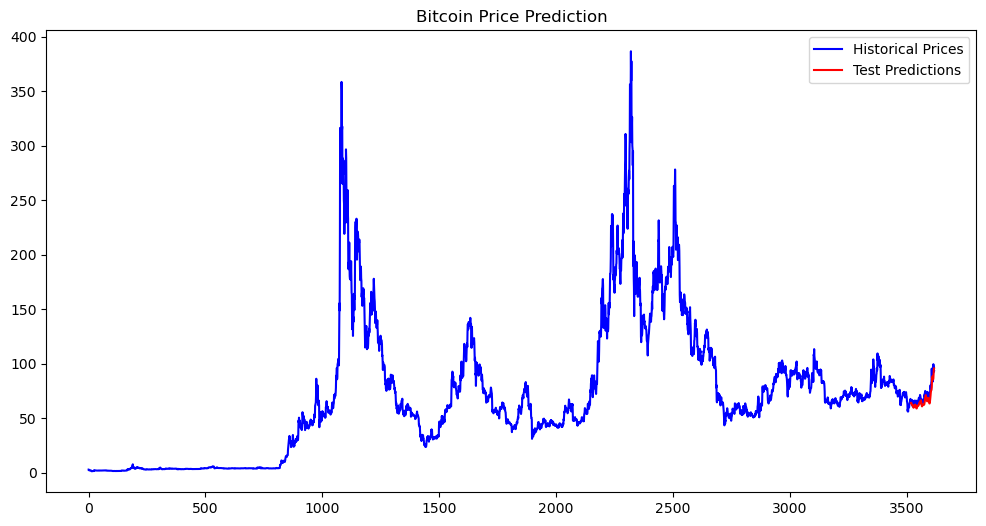

In [15]:
# Adjust predictions to match the last 100 test samples
test_predictions = predictions[-100:]  # Take the last 100 predictions

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Historical Prices", color="blue")
plt.plot(range(len(data) - 100, len(data)), test_predictions, label="Test Predictions", color="red")
plt.title("Bitcoin Price Prediction")
plt.legend()
plt.show()

In [16]:
# 11. Results: Display future prices in a table and save to CSV
future_prices_df = pd.DataFrame(
    list(future_prices.items()), columns=["Date", "PredictedPrice"]
)

# Save the table to a CSV file
future_prices_df.to_csv("LTC_future_predicted_prices.csv", index=False)

# Display the table in the notebook
future_prices_df


,Date,PredictedPrice
0,2024-11-29,94.348373
1,2024-11-30,93.149864
2,2024-12-01,92.226158
3,2024-12-02,91.524170
4,2024-12-03,90.951866
